In [ ]:
pip install numpy pandas matplotlib torch torchvision tqdm jovian


Note: you may need to restart the kernel to use updated packages.


In [ ]:

pip install pyarrow


   ---------------------------------------- 0.0/24.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.8 MB 1.4 MB/s eta 0:00:19
   ---------------------------------------- 0.1/24.8 MB 825.8 kB/s eta 0:00:30
   ---------------------------------------- 0.1/24.8 MB 751.6 kB/s eta 0:00:33
   ---------------------------------------- 0.1/24.8 MB 731.4 kB/s eta 0:00:34
   ---------------------------------------- 0.1/24.8 MB 658.7 kB/s eta 0:00:38
   ---------------------------------------- 0.1/24.8 MB 610.6 kB/s eta 0:00:41
   ---------------------------------------- 0.2/24.8 MB 573.4 kB/s eta 0:00:43
   ---------------------------------------- 0.2/24.8 MB 553.5 kB/s eta 0:00:45
   ---------------------------------------- 0.2/24.8 MB 537.4 kB/s eta 0:00:46
   ---------------------------------------- 0.2/24.8 MB 518.8 kB/s eta 0:00:48
   ---------------------------------------- 0.2/24.8 MB 510.8 kB/s eta 0:00:49
   ---------------------------------------- 0.2/24.8 MB 481.4 k

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,random_split,TensorDataset
from torchvision.utils import make_grid
from torchvision.transforms import ToTensor
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import torchvision.models as models

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
project_name = 'course-project-plant-disease-classification'

In [ ]:
data ='C:/Users/ADMIN/Desktop/project/New Plant Disease/New Plant Disease/'
os.listdir(data)

['test', 'train', 'valid']

In [ ]:
os.listdir(data+'train')

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Strawberry___healthy',
 'Strawberry___Leaf_scorch']

In [ ]:
#No. of unique plants
unique_plants = []
cl = os.listdir(data+'train')
for i in cl:
    x = i.split('_')
    if x[0] not in unique_plants:
        unique_plants.append(x[0])
print("Number of Unique Plants: ",len(unique_plants))
print("Unique Plants: ",unique_plants)

Number of Unique Plants:  4
Unique Plants:  ['Apple', 'Grape', 'Potato', 'Strawberry']


## Loading training and test dataset as tensor

In [ ]:
transform = transforms.Compose(
    [transforms.Resize(size = 128),
     transforms.ToTensor()])

In [ ]:
dataset = ImageFolder(data+'train',transform=transform)
test_ds = ImageFolder(data+'valid',transform=transform)

In [ ]:
print("Number of training images: ",len(dataset))
print("Number of testing images: ",len(test_ds))

Number of training images:  24293
Number of testing images:  6074


In [ ]:
num_classes = dataset.classes
print("Number of classes: ",len(num_classes))
print(num_classes)

Number of classes:  13
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Strawberry___Leaf_scorch', 'Strawberry___healthy']


## Visualising a single image

In [ ]:
image, label  = dataset[1]
print("Image shape:",image.shape)
print("Image Label: ",label)
print("Image Label: ",dataset.classes[label])
print(image)

Image shape: torch.Size([3, 128, 128])
Image Label:  0
Image Label:  Apple___Apple_scab
tensor([[[0.5137, 0.5098, 0.5137,  ..., 0.4863, 0.4784, 0.4745],
         [0.5137, 0.5255, 0.5098,  ..., 0.4863, 0.4784, 0.4824],
         [0.5137, 0.5098, 0.5020,  ..., 0.4863, 0.4784, 0.4863],
         ...,
         [0.2000, 0.2000, 0.2039,  ..., 0.3373, 0.3490, 0.3569],
         [0.1961, 0.1922, 0.1922,  ..., 0.3333, 0.3451, 0.3490],
         [0.1765, 0.1765, 0.1725,  ..., 0.3333, 0.3412, 0.3451]],

        [[0.4863, 0.4824, 0.4863,  ..., 0.4667, 0.4588, 0.4549],
         [0.4863, 0.4980, 0.4824,  ..., 0.4667, 0.4588, 0.4627],
         [0.4863, 0.4824, 0.4745,  ..., 0.4667, 0.4588, 0.4667],
         ...,
         [0.1333, 0.1373, 0.1373,  ..., 0.3059, 0.3176, 0.3255],
         [0.1333, 0.1294, 0.1294,  ..., 0.3020, 0.3137, 0.3216],
         [0.1176, 0.1176, 0.1137,  ..., 0.3059, 0.3098, 0.3176]],

        [[0.6863, 0.6824, 0.6863,  ..., 0.6863, 0.6784, 0.6745],
         [0.6863, 0.6980, 0.6824,  

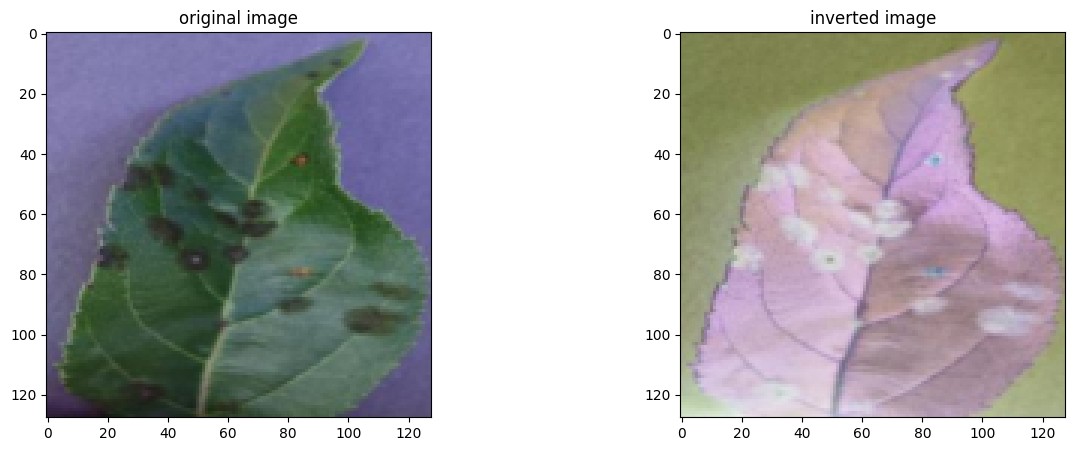

In [ ]:
image, label  = dataset[1]
fig,(ax1,ax2) = plt.subplots(figsize=(15,5),nrows=1,ncols=2)
ax1.imshow(image.permute(1,2,0))
ax1.set_title("original image")
ax2.imshow(1-image.permute(1,2,0))
ax2.set_title("inverted image")
plt.show()

# Validaion Dataset and Dataloader

In [ ]:
random_seed = 42
torch.manual_seed(random_seed)

In [ ]:
validation_split = 0.3
val_size = int(len(dataset) * validation_split)
train_size = len(dataset) - val_size

train_ds,val_ds = random_split(dataset,[train_size,val_size])

In [ ]:
batch_size = 64

train_loader = DataLoader(train_ds,batch_size=batch_size,num_workers=2,shuffle=True, pin_memory=True)
val_loader = DataLoader(val_ds,batch_size=batch_size,num_workers=2,shuffle=True, pin_memory=True)
test_loader = DataLoader(test_ds,batch_size=batch_size,num_workers=2,shuffle=True, pin_memory=True)

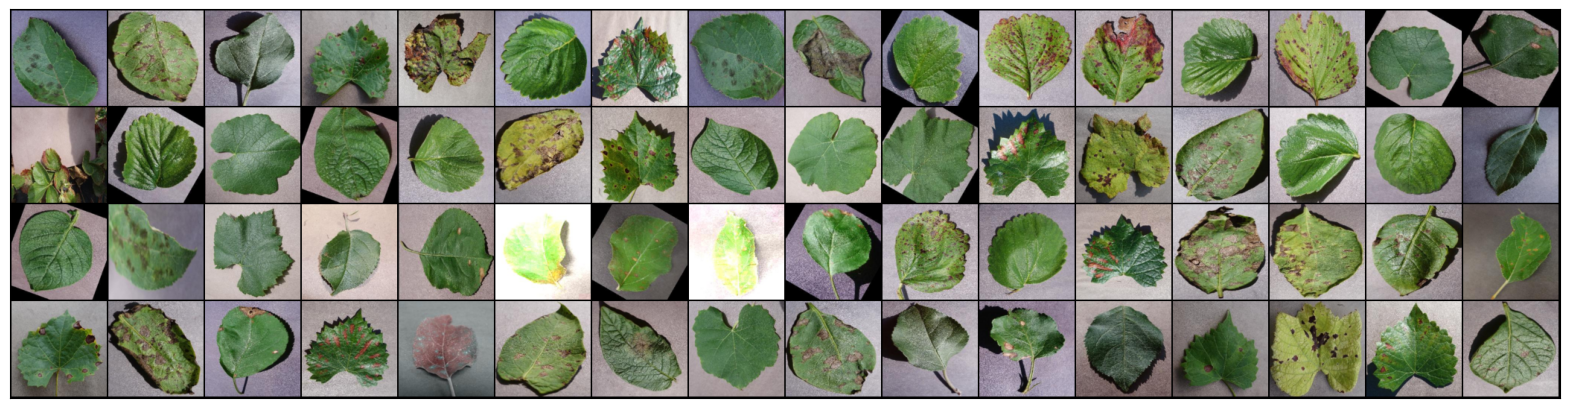

In [ ]:
for images, labels in train_loader:
    fig, ax = plt.subplots(figsize=(20, 8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
    break

# Buliding The Model

Building a Base Image Classification Model

In [ ]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds == labels).item() / len(preds))


class ImageClassificationBase(nn.Module):

  def training_step(self,batch):
    images,labels = batch
    out = self(images)
    loss = F.cross_entropy(out,labels)
    return loss

  def validation_step(self,batch):
    images,labels = batch
    out = self(images)
    loss = F.cross_entropy(out,labels)
    acc = accuracy(out,labels)
    return {'val_loss':loss,'val_acc':acc}

  def validation_epoch_end(self,outputs):
    batch_loss = [out['val_loss'] for out in outputs]
    epoch_loss = torch.stack(batch_loss).mean()
    batch_acc = [out['val_acc'] for out in outputs]
    epoch_acc = torch.stack(batch_acc).mean()
    return {'val_loss':epoch_loss.item(),'val_acc':epoch_acc.item()}

  def epoch_end(self,epoch,result):
    print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['train_loss'], result['val_loss'], result['val_acc']))

# Building a CNN model

In [ ]:
class Plant_Disease_Model(ImageClassificationBase):

  def __init__(self):
    super().__init__()
    self.network = nn.Sequential(
        nn.Conv2d(3,32,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(32,64,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2), #output : 64*64*64

        nn.Conv2d(64,64,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(64,128,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2), #output : 128*32*32

        nn.Conv2d(128,128,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(128,256,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2), #output : 256*16*16

        nn.Conv2d(256,256,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(256,512,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2), #output : 512*8*8

        nn.Conv2d(512,512,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(512,1024,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2), #output : 1024*4*4
        nn.AdaptiveAvgPool2d(1),

        nn.Flatten(),
        nn.Linear(1024,512),
        nn.ReLU(),
        nn.Linear(512,256),
        nn.ReLU(),
        nn.Linear(256,38)
        )

  def forward(self,xb):
    out = self.network(xb)
    return out

## Building a VGG16 model using Transfer Learning

In [ ]:
class Plant_Disease_Model1(ImageClassificationBase):

  def __init__(self):
    super().__init__()
    self.network = models.vgg16(pretrained=True)
    num_ftrs = self.network.classifier[-1].in_features
    self.network.classifier[-1] = nn.Linear(num_ftrs, 38)

  def forward(self,xb):
    out = self.network(xb)
    return out

## Building a resnet34 model using Transfer Learning

In [ ]:
class Plant_Disease_Model2(ImageClassificationBase):

  def __init__(self):
    super().__init__()
    self.network = models.resnet34(pretrained=True)
    num_ftrs = self.network.fc.in_features
    self.network.fc = nn.Linear(num_ftrs, 38)

  def forward(self,xb):
    out = self.network(xb)
    return out

## Training and Evaluation

In [ ]:
@torch.no_grad()
def evaluate(model,val_loader):
  model.eval()
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

In [ ]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
  history = []
  optimizer = opt_func(model.parameters(), lr)
  for epoch in range(epochs):
    model.train()
    train_losses = []
    for batch in tqdm(train_loader):
      loss = model.training_step(batch)
      train_losses.append(loss)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
    result = evaluate(model, val_loader)
    result['train_loss'] = torch.stack(train_losses).mean().item()
    model.epoch_end(epoch, result)
    history.append(result)
  return history

## Using GPU

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cpu')

In [ ]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)
test_loader = DeviceDataLoader(test_loader, device)

In [ ]:
model = to_device(Plant_Disease_Model2(), device)

In [ ]:
model

Plant_Disease_Model2(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=Tr

## Training the model

In [ ]:
evaluate(model,val_loader)

{'val_loss': 3.9485955238342285, 'val_acc': 0.017132675275206566}

In [ ]:
history = fit(10, 0.001, model, train_loader, val_loader, opt_func = torch.optim.Adam)

  0%|          | 0/266 [00:00<?, ?it/s]

Epoch [0], train_loss: 0.2261, val_loss: 0.2271, val_acc: 0.9404


  0%|          | 0/266 [00:00<?, ?it/s]

Epoch [1], train_loss: 0.0893, val_loss: 0.0996, val_acc: 0.9764


  0%|          | 0/266 [00:00<?, ?it/s]

Epoch [2], train_loss: 0.0463, val_loss: 0.2377, val_acc: 0.9238


  0%|          | 0/266 [00:00<?, ?it/s]

Epoch [3], train_loss: 0.0495, val_loss: 0.1128, val_acc: 0.9709


  0%|          | 0/266 [00:00<?, ?it/s]

Epoch [4], train_loss: 0.0264, val_loss: 0.0356, val_acc: 0.9896


  0%|          | 0/266 [00:00<?, ?it/s]

Epoch [5], train_loss: 0.0191, val_loss: 0.4226, val_acc: 0.9056


  0%|          | 0/266 [00:00<?, ?it/s]

Epoch [6], train_loss: 0.0206, val_loss: 0.0639, val_acc: 0.9830


  0%|          | 0/266 [00:00<?, ?it/s]

Epoch [7], train_loss: 0.0581, val_loss: 0.0650, val_acc: 0.9793


  0%|          | 0/266 [00:00<?, ?it/s]

Epoch [8], train_loss: 0.0174, val_loss: 0.0221, val_acc: 0.9936


  0%|          | 0/266 [00:00<?, ?it/s]

Epoch [9], train_loss: 0.0108, val_loss: 0.0682, val_acc: 0.9815


## Plotting accuracy and losses

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

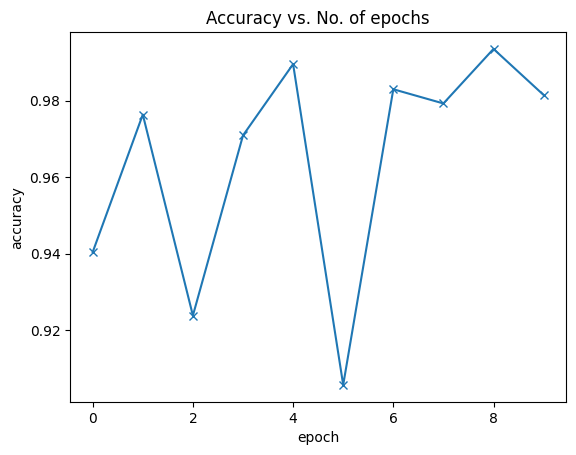

In [ ]:
plot_accuracies(history)

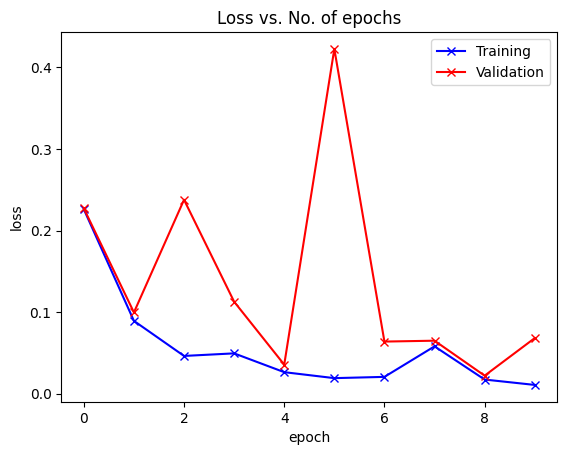

In [ ]:
plot_losses(history)

In [ ]:
evaluate(model,val_loader)

{'val_loss': 0.05483195558190346, 'val_acc': 0.9830043911933899}

## Evaluation and Prediction on Test Data

In [ ]:
x = evaluate(model,test_loader)
x

{'val_loss': 0.04111337289214134, 'val_acc': 0.9856737852096558}

#### Accuracy of the model on test data : 98.56%

## Prediction on some single image of test data

In [ ]:
def predict_image(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return dataset.classes[preds[0].item()]

Label: Apple___Apple_scab , Predicted: Apple___Apple_scab


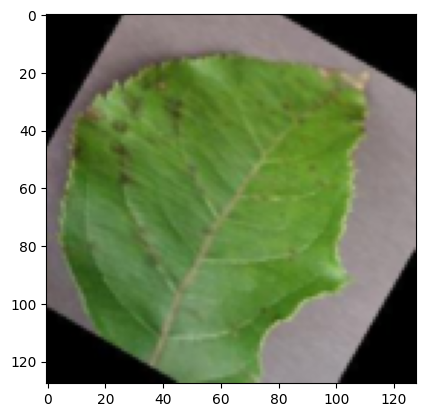

In [ ]:
img, label = test_ds[25]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: Apple___Black_rot , Predicted: Apple___Black_rot


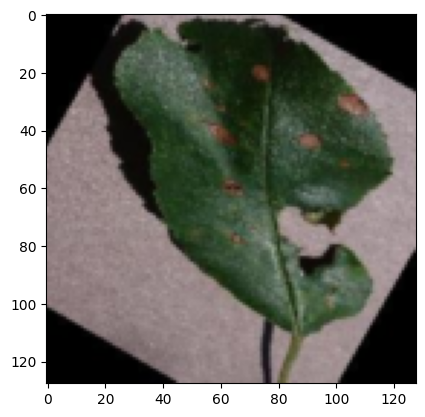

In [ ]:
img, label = test_ds[978]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: Grape___Esca_(Black_Measles) , Predicted: Grape___Esca_(Black_Measles)


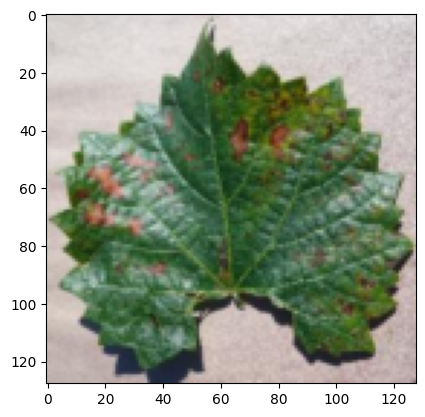

In [ ]:
img, label = test_ds[2548]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [ ]:
torch.save(model.state_dict(), 'plantDisease-resnet34.pth')